In [95]:
import pandas as pd # data processing, CSV file I/O
import numpy as np   # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [8]:
df=pd.read_csv('heartfailure.csv')
df


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [7]:
df.shape

(299, 13)

In [8]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [16]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [17]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


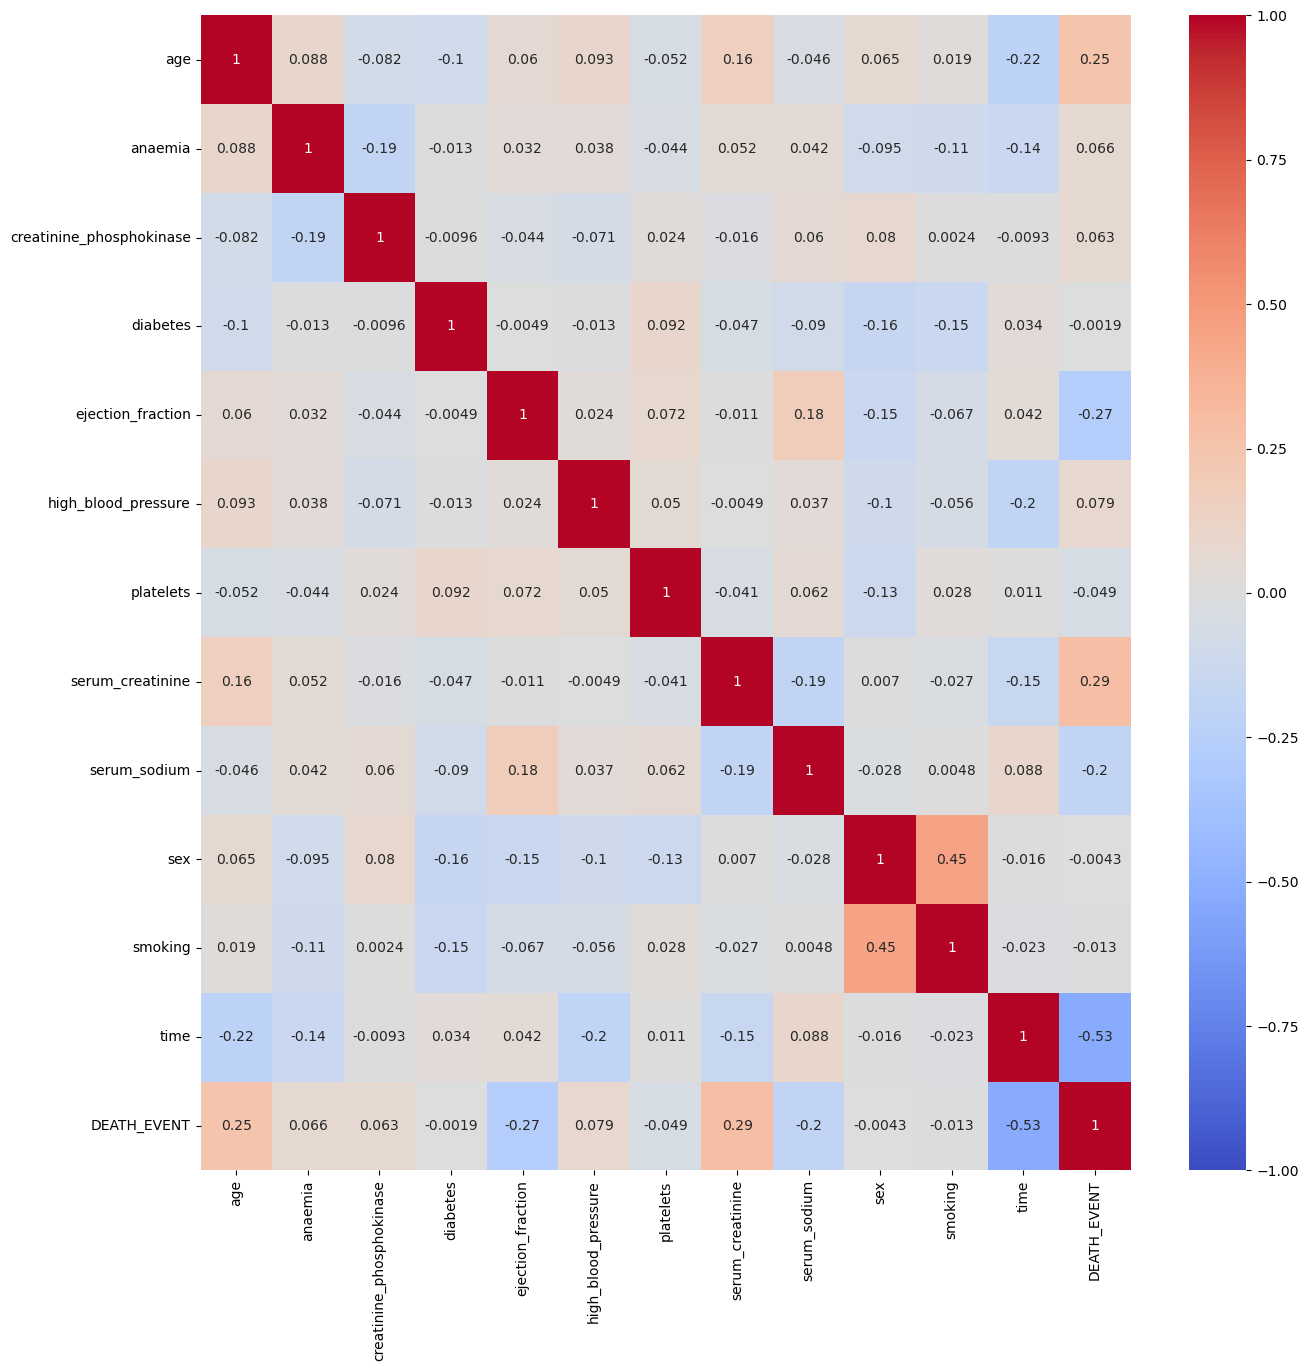

In [14]:
corr = df.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [15]:
missing_percentage = df.isnull().sum() / df.shape[0] * 100
missing_percentage

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

In [21]:
df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [12]:
cor=df.corr()

In [13]:
# Correlation with output variable
cor_target = abs(cor["DEATH_EVENT"])

In [14]:
relevant_features = cor_target[cor_target>0.5]
relevant_features

time           0.526964
DEATH_EVENT    1.000000
Name: DEATH_EVENT, dtype: float64

In [20]:
relevant_features = cor_target[cor_target>0.075]
relevant_features

age                  0.253729
ejection_fraction    0.268603
serum_creatinine     0.294278
serum_sodium         0.195204
time                 0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

In [25]:
newdf=df.drop(['anaemia', 'creatinine_phosphokinase','diabetes','high_blood_pressure','platelets'], axis=1)

In [26]:
newdf

,age,ejection_fraction,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,20,1.9,130,1,0,4,1
1,55.0,38,1.1,136,1,0,6,1
2,65.0,20,1.3,129,1,1,7,1
3,50.0,20,1.9,137,1,0,7,1
4,65.0,20,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...
294,62.0,38,1.1,143,1,1,270,0
295,55.0,38,1.2,139,0,0,271,0
296,45.0,60,0.8,138,0,0,278,0
297,45.0,38,1.4,140,1,1,280,0


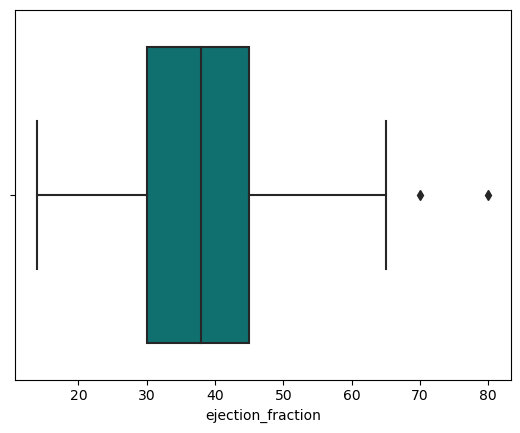

In [27]:
sns.boxplot(x = newdf.ejection_fraction, color = 'teal')
plt.show()

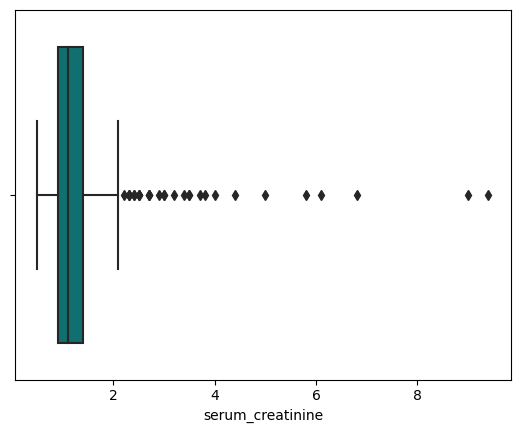

In [29]:
sns.boxplot(x = newdf.serum_creatinine, color = 'teal')
plt.show()

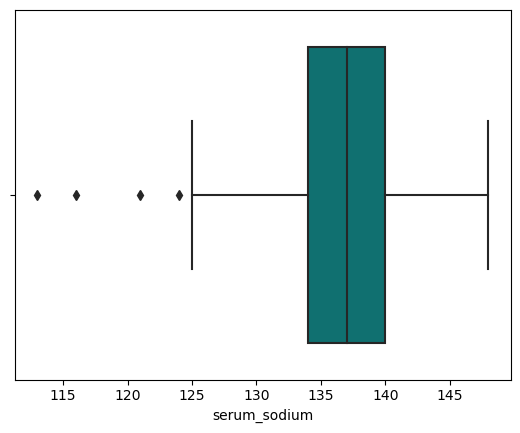

In [33]:
sns.boxplot(x = newdf.serum_sodium, color = 'teal')
plt.show()

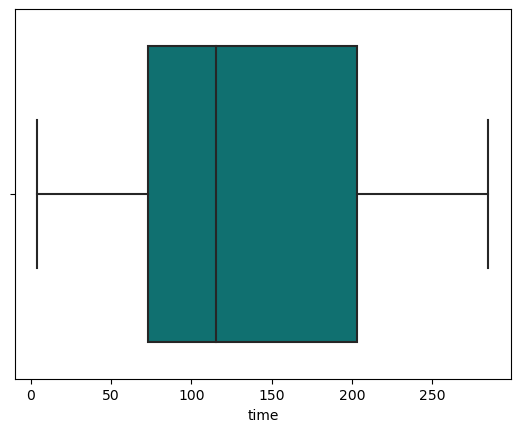

In [34]:
sns.boxplot(x = newdf.time, color = 'teal')
plt.show()

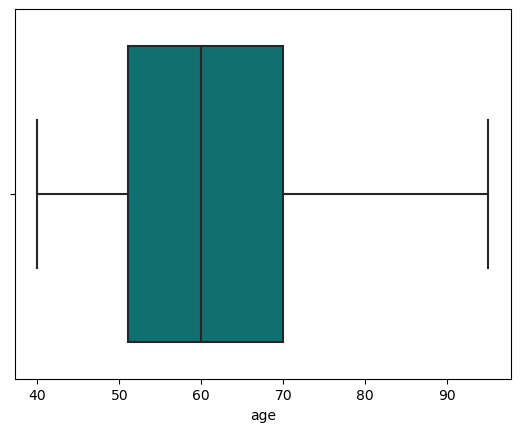

In [35]:
sns.boxplot(x = newdf.age, color = 'teal')
plt.show()

In [49]:
 #finding IQR
def fences(newdf, col):
    Q3 = newdf[col].quantile(0.75)
    Q1 = newdf[col].quantile(0.25)
    IQR = Q3 - Q1
    UB = Q3 + 1.5*IQR
    LB = Q1 - 1.5*IQR
    return UB, LB

In [57]:
for col in ["ejection_fraction","serum_sodium","serum_creatinine"]:
    UB, LB = fences(newdf, col)
    newdf[col] = np.where((newdf[col] > UB), UB, newdf[col])
    newdf[col] = np.where((newdf[col] < LB), LB, newdf[col])

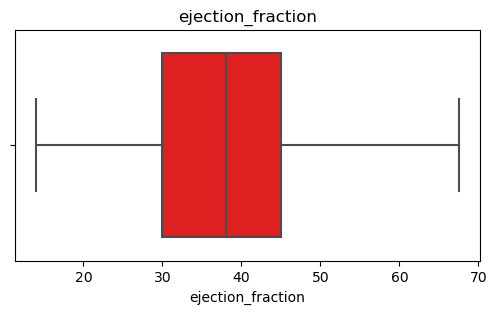

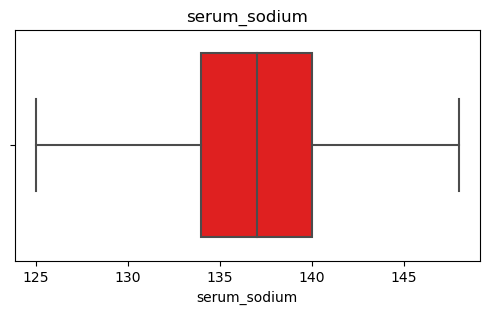

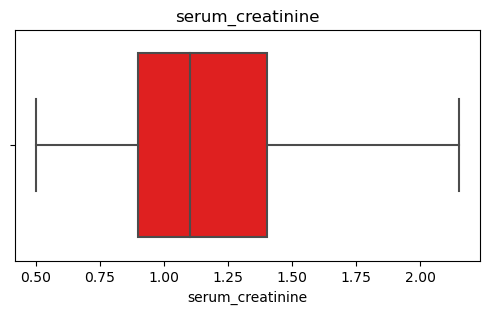

In [58]:
# Checking for outliers after removal
cols = ["ejection_fraction","serum_sodium","serum_creatinine"]
for col in cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x = newdf[col], color = "red")
    plt.title(col)

In [72]:
# categorizing  by DEATH_EVENT

import plotly.express as px
fig = px.histogram(newdf, x="age", color="DEATH_EVENT", hover_data=newdf.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

In [71]:
fig = px.histogram(newdf, x="ejection_fraction", color="DEATH_EVENT", hover_data=newdf.columns, 
                   title ="Distribution of EJECTION_FRACTION Vs DEATH_EVENT", 
                   labels={"ejection_fraction": "ejection_fraction"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

In [70]:
fig = px.histogram(newdf, x="serum_creatinine", color="DEATH_EVENT", hover_data=newdf.columns, 
                   title ="Distribution of SERUM_CREATININE Vs DEATH_EVENT", 
                   labels={"serum_creatinine": "serum_creatinine"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

In [69]:
fig = px.histogram(newdf, x="serum_sodium", color="DEATH_EVENT", hover_data=newdf.columns, 
                   title ="Distribution of SERUM_SODIUM Vs DEATH_EVENT", 
                   labels={"serum_sodium": "serum_sodium"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

In [68]:
fig = px.histogram(newdf, x="sex", color="DEATH_EVENT", hover_data=newdf.columns, 
                   title ="Distribution of SEX Vs DEATH_EVENT", 
                   labels={"sex": "sex"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

In [67]:
fig = px.histogram(newdf, x="smoking", color="DEATH_EVENT", hover_data=newdf.columns, 
                   title ="Distribution of SMOKING Vs DEATH_EVENT", 
                   labels={"smoking": "smoking"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()


In [66]:
fig = px.histogram(newdf, x="time", color="DEATH_EVENT", hover_data=newdf.columns, 
                   title ="Distribution of TIME Vs DEATH_EVENT", 
                   labels={"time": "time"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()


In [119]:
# Splitting the dataset into training set and test set
x = newdf.drop(columns="DEATH_EVENT") 
y = newdf["DEATH_EVENT"] 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)
Classifier_Name= []
Accuracy= []

Accuracy:  0.8333333333333334
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        37
           1       0.78      0.78      0.78        23

    accuracy                           0.83        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.83      0.83      0.83        60



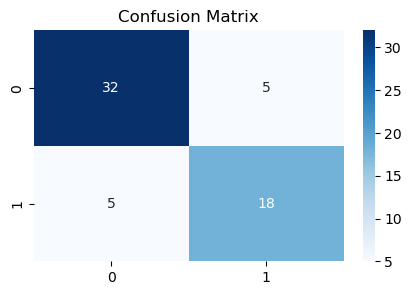

In [120]:
dtc= DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print(classification_report(y_test, y_pred))

Classifier_Name.append("Decision Tree")
Accuracy.append(accuracy_score(y_test, y_pred))

cmat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
plt.title("Confusion Matrix")
sns.heatmap(cmat,annot=True,cmap="Blues");


Accuracy:  0.85
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        37
           1       0.94      0.65      0.77        23

    accuracy                           0.85        60
   macro avg       0.88      0.81      0.83        60
weighted avg       0.86      0.85      0.84        60



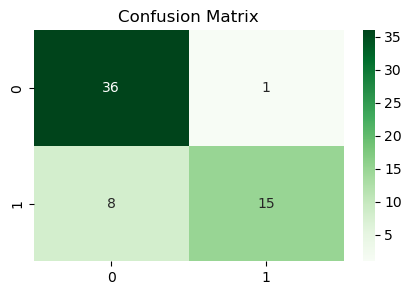

In [121]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print(classification_report(y_test, y_pred))

Classifier_Name.append("Random Forest")
Accuracy.append(accuracy_score(y_test, y_pred))

cmat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
plt.title("Confusion Matrix")
sns.heatmap(cmat,annot=True,cmap="Greens");

Accuracy:  0.7666666666666667
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        37
           1       0.80      0.52      0.63        23

    accuracy                           0.77        60
   macro avg       0.78      0.72      0.73        60
weighted avg       0.77      0.77      0.75        60



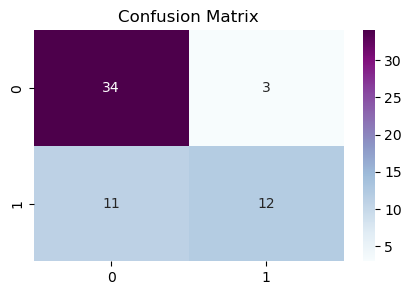

In [122]:
nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print(classification_report(y_test, y_pred))

Classifier_Name.append("Naive Bayesian")
Accuracy.append(accuracy_score(y_test, y_pred))

cmat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
plt.title("Confusion Matrix")
sns.heatmap(cmat,annot=True,cmap="BuPu");

Accuracy:  0.85
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        37
           1       1.00      0.61      0.76        23

    accuracy                           0.85        60
   macro avg       0.90      0.80      0.82        60
weighted avg       0.88      0.85      0.84        60



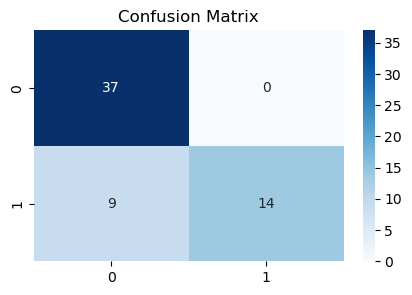

In [133]:
svm = SVC(kernel = 'rbf', random_state=1)
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print(classification_report(y_test, y_pred))

Classifier_Name.append("SVM")
Accuracy.append(accuracy_score(y_test, y_pred))

cmat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
plt.title("Confusion Matrix")
sns.heatmap(cmat,annot=True,cmap="Blues");

Text(0, 0.5, 'Accuracy')

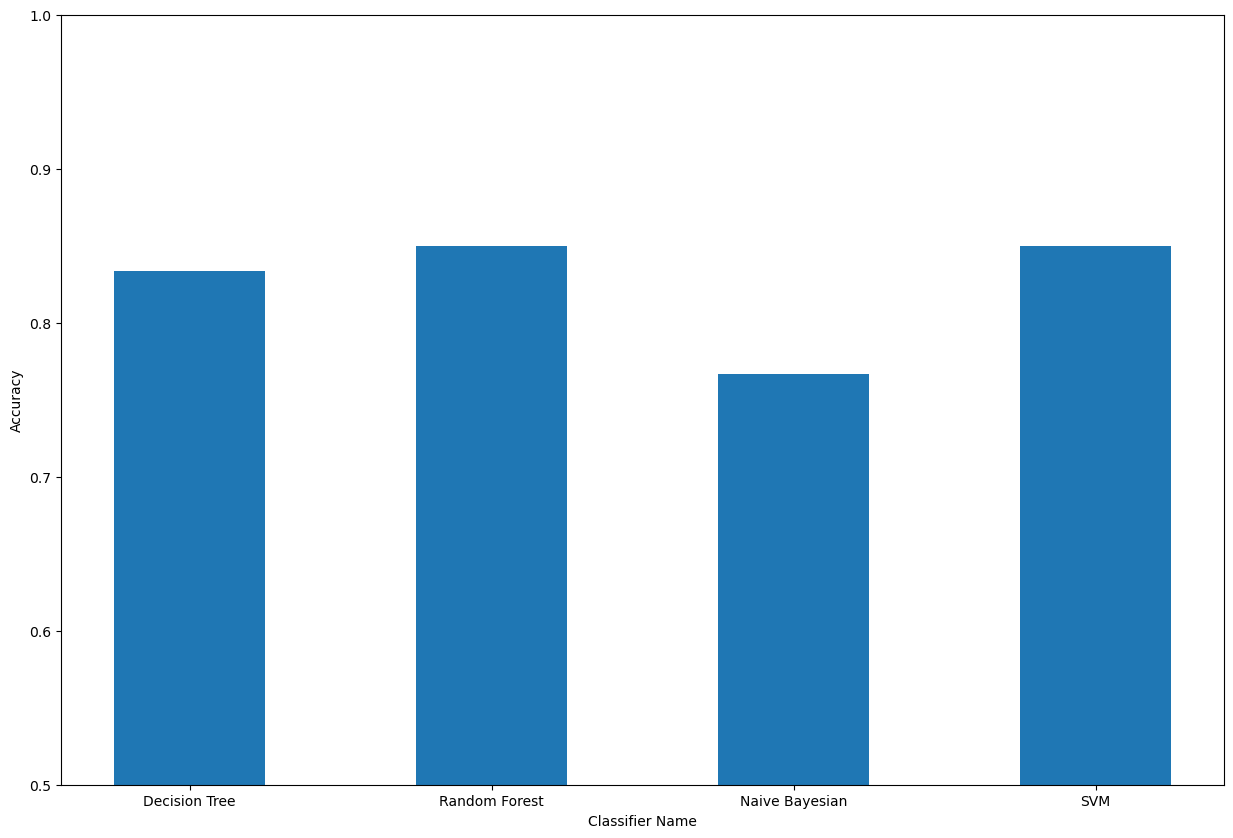

In [134]:
plt.figure(figsize=(15,10))
plt.ylim([0.5,1])
plt.bar(Classifier_Name,Accuracy,width=0.5)
plt.xlabel('Classifier Name')
plt.ylabel('Accuracy')


In [ ]:
# SVM and Random forest classifiers gives the highest accuracy of 85%